In [1]:
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/flight-delays/flights.csv',nrows=500000)
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2015,2,3,2,WN,740,N647SW,DAL,MCO,605,...,910.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
499996,2015,2,3,2,WN,1711,N8315C,MDW,DEN,605,...,744.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
499997,2015,2,3,2,WN,371,N438WN,MDW,PIT,605,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
499998,2015,2,3,2,WN,1267,N211WN,MDW,TPA,605,...,927.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 500000 non-null  int64  
 1   MONTH                500000 non-null  int64  
 2   DAY                  500000 non-null  int64  
 3   DAY_OF_WEEK          500000 non-null  int64  
 4   AIRLINE              500000 non-null  object 
 5   FLIGHT_NUMBER        500000 non-null  int64  
 6   TAIL_NUMBER          496250 non-null  object 
 7   ORIGIN_AIRPORT       500000 non-null  object 
 8   DESTINATION_AIRPORT  500000 non-null  object 
 9   SCHEDULED_DEPARTURE  500000 non-null  int64  
 10  DEPARTURE_TIME       483584 non-null  float64
 11  DEPARTURE_DELAY      483584 non-null  float64
 12  TAXI_OUT             483296 non-null  float64
 13  WHEELS_OFF           483296 non-null  float64
 14  SCHEDULED_TIME       499999 non-null  float64
 15  ELAPSED_TIME     

In [4]:
#checking for null values in the dataset
df.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              3750
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          16416
DEPARTURE_DELAY         16416
TAXI_OUT                16704
WHEELS_OFF              16704
SCHEDULED_TIME              1
ELAPSED_TIME            17948
AIR_TIME                17948
DISTANCE                    0
WHEELS_ON               17159
TAXI_IN                 17159
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            17159
ARRIVAL_DELAY           17948
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    483176
AIR_SYSTEM_DELAY       397701
SECURITY_DELAY         397701
AIRLINE_DELAY          397701
LATE_AIRCRAFT_DELAY    397701
WEATHER_DELAY          397701
dtype: int64

In [5]:
def onehot_encode(df,columns):
    df=df.copy()
    for col in columns:
        dummies=pd.get_dummies(df[col],prefix=col)
        for column, dtype in dummies.dtypes.items():
            if dtype == 'bool':
                dummies[column]=dummies[column].astype(int)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(col,axis=1)
    return df

In [6]:
    for column in df.columns:
        if df[column].dtype=='bool':
            df[column]=df[column].astype(int)
        

In [19]:
#creating preprocessing function
def preprocess_inputs(df):
    df=df.copy()
    #columns with higher percentage of missing value
    missing_columns=df.loc[:,df.isna().mean()>0.30].columns
    df=df.drop(missing_columns,axis=1)
    
    #dropping column with high cardinality column
    df=df.drop(['TAIL_NUMBER','FLIGHT_NUMBER','YEAR'],axis=1)
    onehot_columns=[column for column in df.columns if df[column].dtype=='object']
    df=onehot_encode(df,onehot_columns)
    for column in df.columns:
        df[column]=df[column].fillna(df[column].mean())
        
    #splitting target and feature column
    
    y=df['CANCELLED']
    x=df.drop('CANCELLED',axis=1)
    
    #train_test_split
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
        
        


    return x_train,x_test,y_train,y_test

In [20]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350000, 658)
(150000, 658)
(350000,)
(150000,)


In [22]:
x_test

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
112430,-0.253068,-0.750553,-0.002303,-1.117125,-1.218941,-0.327434,-1.000235,-1.170791,-0.804909,-0.877581,...,-0.020844,-0.035640,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813
338861,-0.253068,0.858302,0.494549,-1.106449,-1.115108,-0.219878,-0.578490,-1.143228,-1.138847,-1.084674,...,-0.020844,-0.035640,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813
464653,-0.253068,1.716358,0.991400,0.014587,-0.034406,-0.623214,-1.105671,-0.072481,-0.671333,-0.725712,...,-0.020844,-0.035640,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813
344237,-0.253068,0.858302,0.494549,-0.006766,-0.028049,-0.273656,-0.051309,-0.044917,-0.337395,-0.297719,...,-0.020844,28.058658,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813
356227,-0.253068,0.965559,0.991400,-0.666576,-0.417950,2.011913,0.686745,-0.420209,-0.991914,-0.753325,...,-0.020844,-0.035640,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184213,-0.253068,-0.321525,-1.492857,1.658773,-0.000593,-0.001468,0.000130,-0.000990,-0.978557,0.000201,...,-0.020844,-0.035640,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813
346141,-0.253068,0.858302,0.494549,0.411754,0.387279,-0.273656,1.635671,0.404584,-0.484328,-0.394362,...,-0.020844,-0.035640,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813
221875,-0.253068,0.000246,-0.002303,-0.401798,-0.426426,-0.354323,-0.051309,-0.443532,-0.671333,-0.601456,...,-0.020844,-0.035640,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813
97474,-0.253068,-0.857810,-0.499154,-1.042390,-1.013395,0.264125,1.108490,-0.922717,1.826525,2.049342,...,-0.020844,-0.035640,-0.005856,-0.011085,-0.013629,-0.029093,-0.011085,-0.039528,-0.011465,-0.01813


# Constructing and Training the Model

In [23]:
model=LogisticRegression()
model.fit(x_train,y_train)
print('The model score is',model.score(x_test,y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model score is 0.9693266666666667


In [24]:
y_pred=model.predict(x_test)

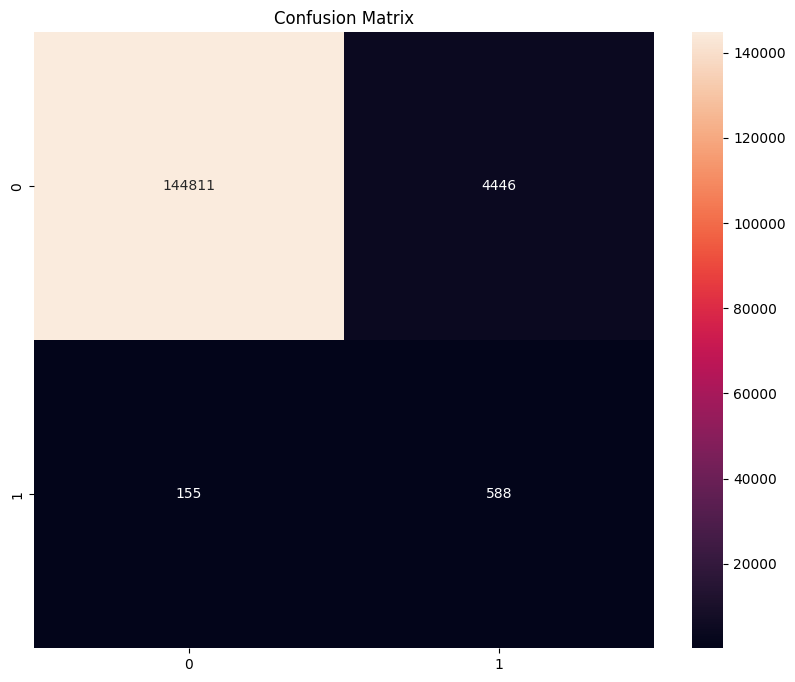

In [25]:
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,8))
sns.heatmap(cm,fmt='g',annot=True)
plt.title('Confusion Matrix')
plt.show()


# Classification_report

In [27]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    149257
           1       0.12      0.79      0.20       743

    accuracy                           0.97    150000
   macro avg       0.56      0.88      0.59    150000
weighted avg       0.99      0.97      0.98    150000



In [16]:
x.isna().sum().sum()

0

In [9]:
for column in df.columns:
    if df[column].dtype=='bool':
        print(column)

In [10]:
[column for column in df.columns if df[column].dtype=='object']

['AIRLINE',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'CANCELLATION_REASON']

In [11]:
{column:len(list(x[column].unique())) for column in x.columns if x[column].dtype=='object'}

{}